In [1]:
import pandas as pd
from pathlib import Path

def load_flight_data(data_dir: str = "flight_samples", data_type: str = "flights") -> pd.DataFrame:
    """
    Load and concatenate all flight sample data from CSV files into a single DataFrame
    
    Args:
        data_dir: Directory containing the sample data
        data_type: Type of data to load ('flights' or 'state_vectors')
        
    Returns:
        pd.DataFrame: Concatenated DataFrame containing all sample data
    """
    data_path = Path(data_dir)
    
    # Define pattern based on data type
    pattern = f"{data_type}_*.csv"
    
    # Get list of all matching CSV files
    csv_files = list(data_path.glob(pattern))
    
    if not csv_files:
        raise FileNotFoundError(f"No {data_type} CSV files found in {data_dir}")
    
    # Read and concatenate all CSV files
    dfs = [pd.read_csv(file) for file in csv_files]
    combined_df = pd.concat(dfs, ignore_index=True)
    
    return combined_df

# Example usage:
# Load flight data
flights_df = load_flight_data(data_dir="/Users/julienh/Desktop/MADS/Milestone2/flight_samples", data_type="flights")

# Load state vectors data if needed
# state_vectors_df = load_flight_data(data_dir="flight_samples", data_type="state_vectors")

# Display basic information about the loaded data
print(f"Loaded {len(flights_df)} flight records")
flights_df.info()

Loaded 125433 flight records
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125433 entries, 0 to 125432
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   icao24     125433 non-null  object
 1   firstseen  125271 non-null  object
 2   departure  100465 non-null  object
 3   lastseen   125433 non-null  object
 4   arrival    108242 non-null  object
 5   callsign   125188 non-null  object
 6   day        125433 non-null  object
dtypes: object(7)
memory usage: 6.7+ MB


In [2]:
flights_df

,icao24,firstseen,departure,lastseen,arrival,callsign,day
0,acc619,2024-11-13 09:24:42+00:00,NaN,2024-11-13 10:11:18+00:00,6FL2,FDX1481,2024-11-13 00:00:00+00:00
1,8965fc,2024-11-13 06:16:33+00:00,NaN,2024-11-13 10:43:48+00:00,NaN,ROJ010,2024-11-13 00:00:00+00:00
2,7bb0dc,2024-11-13 10:28:34+00:00,NaN,2024-11-13 10:52:16+00:00,NaN,CCA1953,2024-11-13 00:00:00+00:00
3,e49d51,2024-11-13 10:22:11+00:00,NaN,2024-11-13 10:32:29+00:00,NaN,PSESP,2024-11-13 00:00:00+00:00
4,780d89,2024-11-13 10:10:36+00:00,VHHH,2024-11-13 10:23:20+00:00,NaN,CCA110,2024-11-13 00:00:00+00:00
...,...,...,...,...,...,...,...
125428,c01e5b,2024-08-23 09:58:12+00:00,NaN,2024-08-23 12:26:49+00:00,KHEF,CFLMW,2024-08-23 00:00:00+00:00
125429,c03488,2024-08-23 10:15:06+00:00,CYYZ,2024-08-23 12:26:26+00:00,CYYZ,SWG4520,2024-08-23 00:00:00+00:00
125430,e03545,2024-08-23 12:00:04+00:00,SADF,2024-08-23 12:22:44+00:00,NaN,LVCUE,2024-08-23 00:00:00+00:00
125431,01801f,2024-08-23 12:45:00+00:00,NaN,2024-08-23 12:59:56+00:00,NaN,BRQ002,2024-08-23 00:00:00+00:00


In [8]:
import FlightDataAnalyzer
import importlib
importlib.reload(FlightDataAnalyzer)


<module 'FlightDataAnalyzer' from '/Users/julienh/Desktop/MADS/Milestone2/notebooks/julien-hovan/FlightDataAnalyzer.py'>

Flight Duration Statistics:
  mean_duration: 97.45876872274243
  median_duration: 63.05
  min_duration: 10.016666666666667
  max_duration: 2570.483333333333

Hourly Flight Distribution:
hour
0.0       838
1.0       624
2.0       746
3.0       977
4.0      1839
5.0      4122
6.0      4629
7.0      3699
8.0      3689
9.0      4932
10.0     5568
11.0     5911
12.0     7429
13.0    13818
14.0    11862
15.0     7898
16.0     8340
17.0    10282
18.0    14668
19.0    10582
20.0     2718
21.0       21
22.0       35
23.0       44
Name: count, dtype: int64

Top 10 Flight Routes:
departure  arrival
KDAB       KDAB       180
KFFZ       KFFZ       166
KHWO       KHWO       151
KMLB       KMLB       129
KBJC       KBJC       125
KIWA       KIWA       122
KFRG       KFRG       112
KAPA       KAPA       102
KDVT       KDVT       102
KVGT       KVGT        96
dtype: int64

Top 10 Airlines:
callsign
N           33
00000000    29
LIFELN1     11
C33         11
GOJUMP3     10
N445ME      10
FFAB123     10


<module 'matplotlib.pyplot' from '/Users/julienh/Desktop/MADS/Milestone2/venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

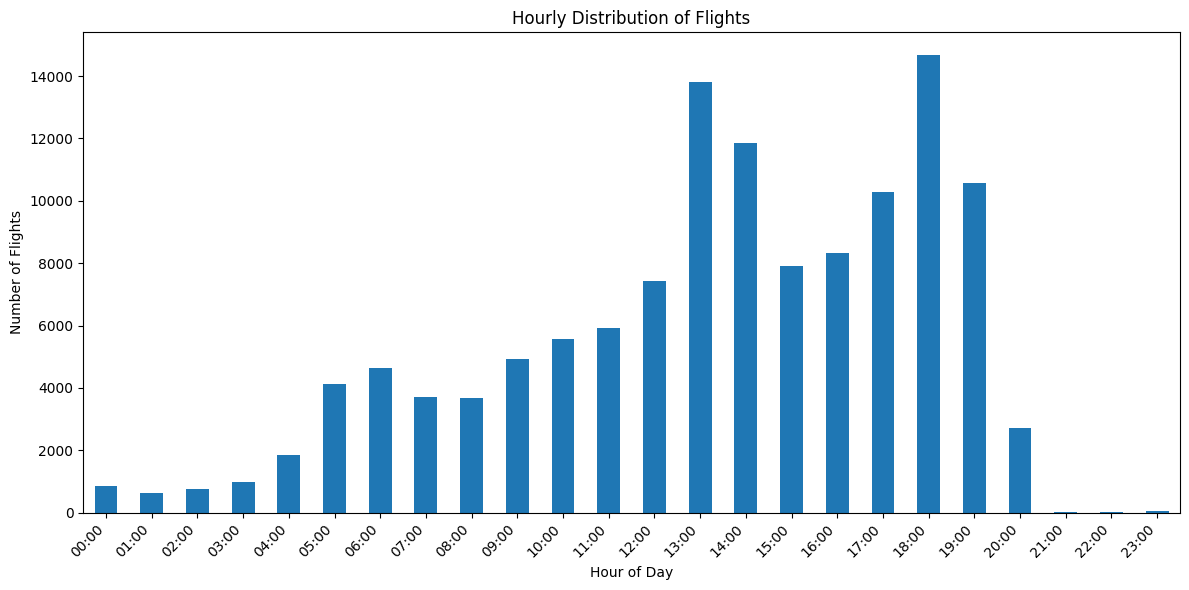

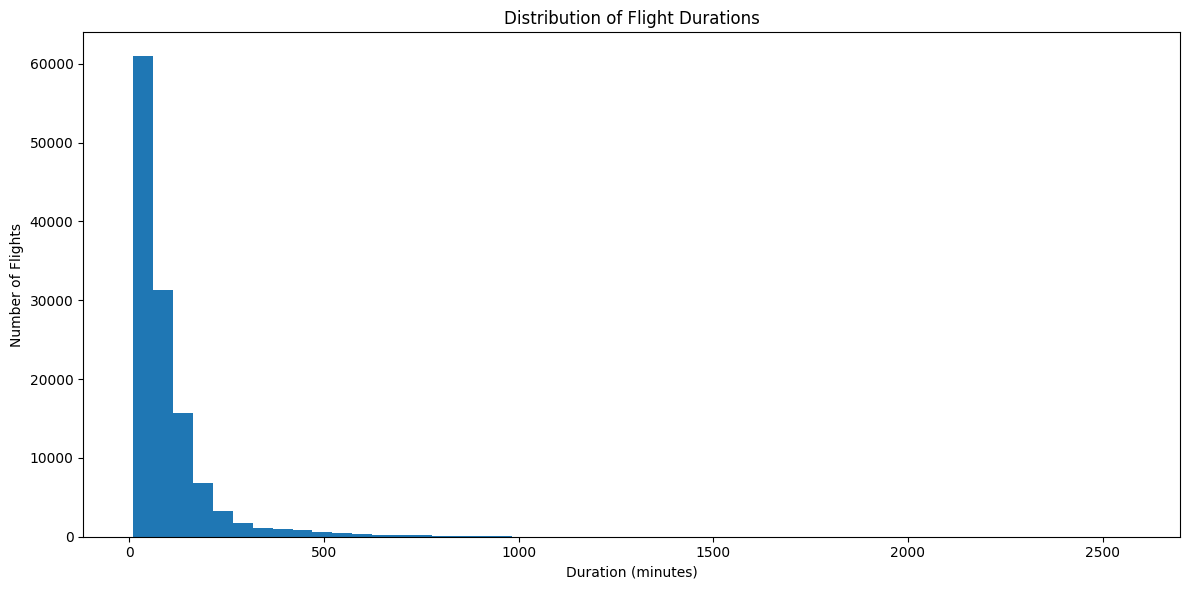

In [9]:
analyzer = FlightDataAnalyzer.FlightDataAnalyzer(flights_df)

# Get flight duration statistics
duration_stats = analyzer.analyze_flight_durations()
print("Flight Duration Statistics:")
for key, value in duration_stats.items():
    print(f"  {key}: {value}")

# Get hourly distribution of flights
hourly_dist = analyzer.analyze_hourly_distribution()
print("\nHourly Flight Distribution:")
print(hourly_dist)

# Get top 10 most common routes
top_routes = analyzer.analyze_routes()
print("\nTop 10 Flight Routes:")
print(top_routes)

# Get top 10 most active airlines
airline_freq = analyzer.analyze_airlines()
print("\nTop 10 Airlines:")
print(airline_freq)

# Check missing data percentages
missing_data = analyzer.analyze_missing_data()
print("\nMissing Data Percentages:")
print(missing_data)

# Create visualizations
analyzer.plot_hourly_distribution()
analyzer.plot_flight_duration_histogram()

In [10]:
# Get top 10 routes between different airports
different_routes = analyzer.analyze_different_airport_routes()
print("\nTop 10 Routes Between Different Airports:")
print(different_routes)


Top 10 Routes Between Different Airports:
departure  arrival
FACT       FAOR       58
FAOR       FACT       54
KLAS       KU30       52
KTMB       FA35       46
YSSY       YMML       41
VIDP       VOBL       41
RJTT       RJFF       40
KLAX       KSFO       39
YSSY       YBBN       39
YMML       YSSY       38
dtype: int64


/Users/julienh/Desktop/MADS/Milestone2/notebooks/julien-hovan/FlightDataAnalyzer.py:114: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  return self.df.groupby(self.df['firstseen'].dt.to_period('M')).size()



Top 5 routes in Fall:
departure  arrival
KDAB       KDAB       75
KHWO       KHWO       58
KFFZ       KFFZ       51
KBJC       KBJC       46
KAPA       KAPA       44
dtype: int64

Top 5 routes in Winter:
departure  arrival
KFFZ       KFFZ       36
KMLB       KMLB       33
KIWA       KIWA       32
KTTN       KTTN       30
KGYR       KGYR       29
dtype: int64

Top 5 routes in Spring:
departure  arrival
KFFZ       KFFZ       30
YSSY       YMML       23
KIWA       KIWA       20
YPJT       YPJT       19
KMYF       KMYF       19
dtype: int64

Top 5 routes in Summer:
departure  arrival
KDAB       KDAB       64
KHWO       KHWO       50
KFFZ       KFFZ       49
KBJC       KBJC       47
KMLB       KMLB       43
dtype: int64

Top 5 routes in month 11.0:
departure  arrival
KFXE       KFXE       11
KSFB       KSFB       11
KDAB       KDAB       10
LFBG       LFBG       10
KJNX       KJNX        9
dtype: int64

Top 5 routes in month nan:
Series([], dtype: int64)

Top 5 routes in month 9.0:
departu

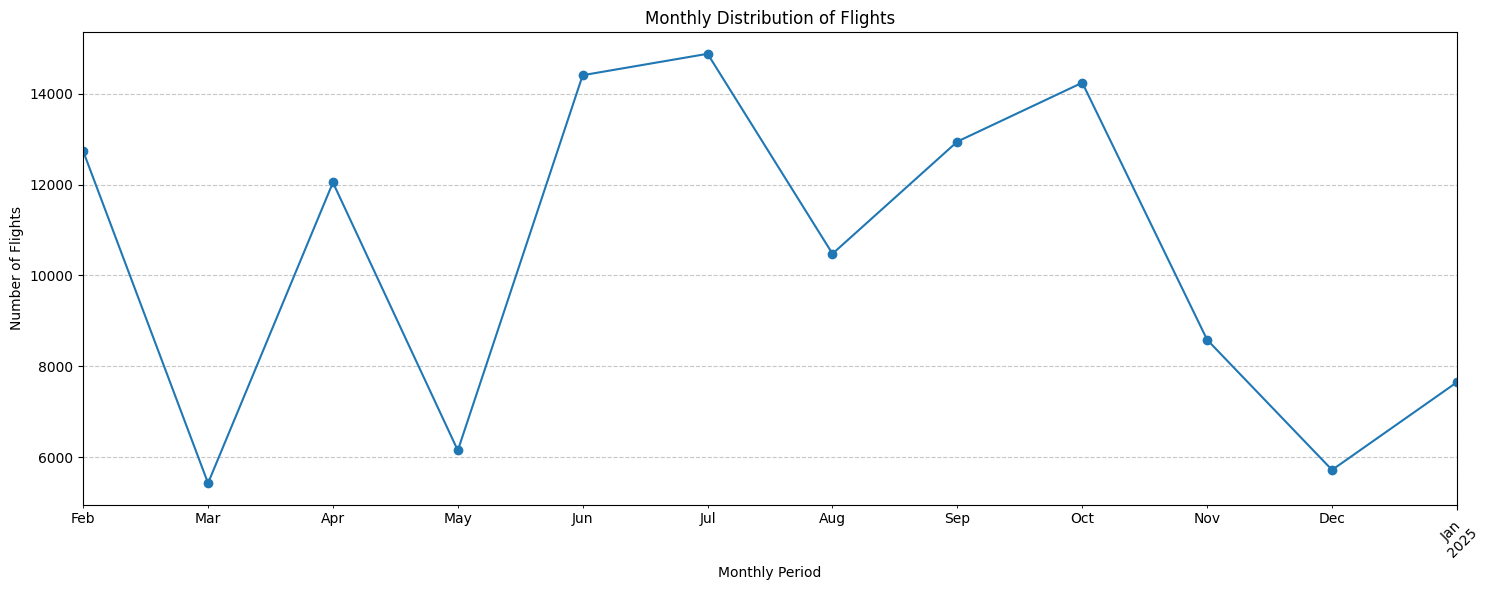

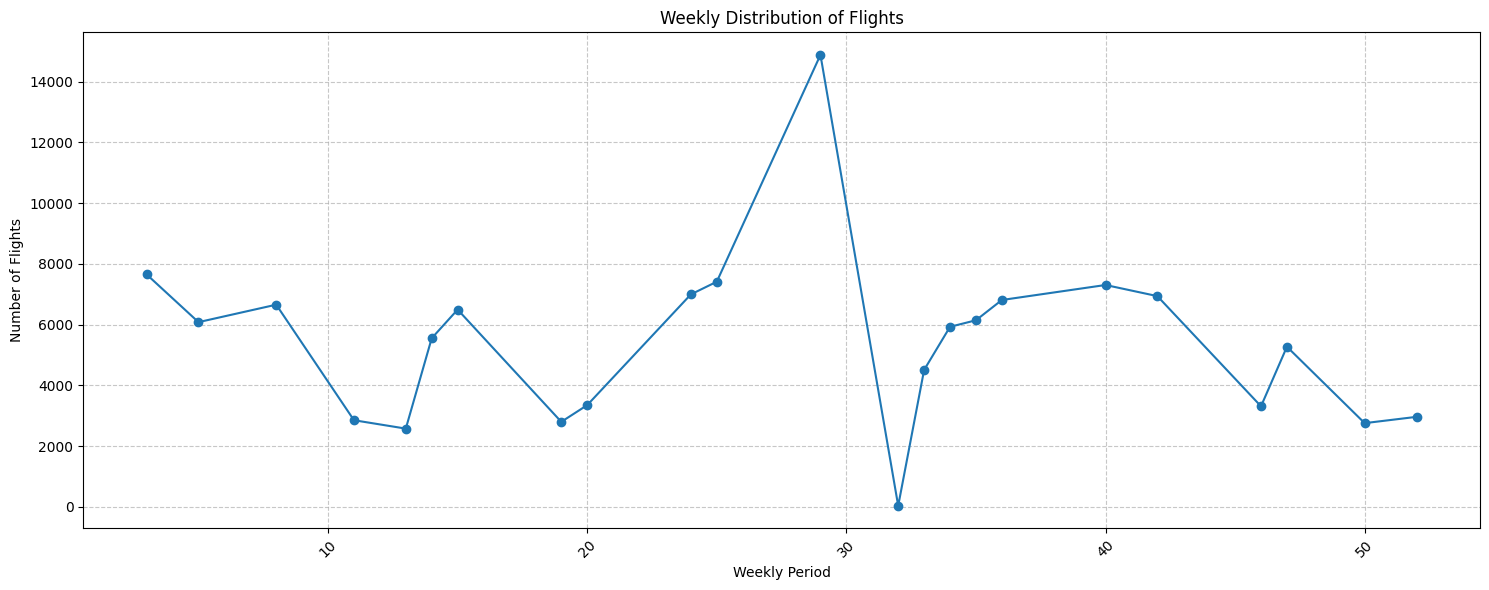

In [11]:
# Plot monthly patterns
analyzer.plot_seasonal_patterns(freq='M')

# Plot weekly patterns
analyzer.plot_seasonal_patterns(freq='W')

# Analyze seasonal routes
seasonal_routes = analyzer.analyze_seasonal_routes(season_type='season')
for season, routes in seasonal_routes.items():
    print(f"\nTop 5 routes in {season}:")
    print(routes)

# Analyze monthly routes
monthly_routes = analyzer.analyze_seasonal_routes(season_type='month')
for month, routes in monthly_routes.items():
    print(f"\nTop 5 routes in month {month}:")
    print(routes)

In [12]:

# flight vectors
state_vectors_df = load_flight_data(data_dir="/Users/julienh/Desktop/MADS/Milestone2/flight_samples", data_type="state_vectors")


state_vectors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15523805 entries, 0 to 15523804
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   time         object 
 1   icao24       object 
 2   callsign     object 
 3   lat          float64
 4   lon          float64
 5   velocity     float64
 6   heading      float64
 7   geoaltitude  float64
 8   onground     bool   
dtypes: bool(1), float64(5), object(3)
memory usage: 962.3+ MB


In [14]:
state_vectors_df.head()

,time,icao24,callsign,lat,lon,velocity,heading,geoaltitude,onground
0,2024-05-10 06:00:11+00:00,a27a2d,AAY2712,31.845269,-84.870282,231.250446,191.809883,9875.52,False
1,2024-05-10 06:00:12+00:00,a27a2d,AAY2712,31.845269,-84.870282,231.847075,191.260067,9875.52,False
2,2024-05-10 06:00:13+00:00,a27a2d,AAY2712,31.845269,-84.870282,231.847075,191.260067,9875.52,False
3,2024-05-10 06:00:14+00:00,a27a2d,AAY2712,31.845269,-84.870282,232.417692,189.941861,9875.52,False
4,2024-05-10 06:00:15+00:00,a27a2d,AAY2712,31.845269,-84.870282,232.495110,189.295583,9875.52,False


In [18]:
# Load your dataframes
flight_stats_df = compute_flight_statistics(flights_df, state_vectors_df)

# Get basic statistics
print(flight_stats_df.describe())

# Look at specific flights
print(flight_stats_df[flight_stats_df['duration_minutes'] > 120])  # Longer flights

KeyboardInterrupt: 

In [21]:
import pandas as pd
import numpy as np

# Convert time columns to datetime
state_vectors_df['time'] = pd.to_datetime(state_vectors_df['time'], errors='coerce')
flights_df['firstseen'] = pd.to_datetime(flights_df['firstseen'], errors='coerce')
flights_df['lastseen'] = pd.to_datetime(flights_df['lastseen'], errors='coerce')

# Sort state_vectors_df by icao24 and time for efficient searching
state_vectors_df.sort_values(['icao24', 'time'], inplace=True)

# Group the sorted state vectors by icao24
state_groups = state_vectors_df.groupby('icao24')

# Initialize columns for average statistics in flights_df
flights_df['avg_velocity'] = np.nan
flights_df['avg_heading'] = np.nan
flights_df['avg_geoaltitude'] = np.nan

# Iterate through each flight to compute averages
for idx, flight in flights_df.iterrows():
    icao = flight['icao24']
    first = flight['firstseen']
    last = flight['lastseen']
    callsign = flight['callsign']
    
    # Skip if no state vectors exist for this icao24 or timestamps are invalid
    if icao not in state_groups.groups or pd.isnull(first) or pd.isnull(last):
        continue
    
    # Get state vectors for the current icao24
    states = state_groups.get_group(icao)
    
    # Filter by callsign if available in the flight data
    if pd.notnull(callsign):
        states = states[states['callsign'] == callsign]
        if states.empty:
            continue
    
    # Use binary search to find the time window indices
    times = states['time'].values  # Ensure this is datetime64 (check dtype if issues persist)
    
    # Explicitly convert pandas Timestamps to numpy datetime64
    first_np = first.to_numpy()
    last_np = last.to_numpy()
    
    start_idx = np.searchsorted(times, first_np, side='left')
    end_idx = np.searchsorted(times, last_np, side='right')
    
    # Extract the relevant state vectors within the time window
    flight_states = states.iloc[start_idx:end_idx]
    
    if not flight_states.empty:
        # Calculate and assign the mean values
        flights_df.at[idx, 'avg_velocity'] = flight_states['velocity'].mean()
        flights_df.at[idx, 'avg_heading'] = flight_states['heading'].mean()
        flights_df.at[idx, 'avg_geoaltitude'] = flight_states['geoaltitude'].mean()

# Optional: Display the updated flights_df with new average columns
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125433 entries, 0 to 125432
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   icao24           125433 non-null  object             
 1   firstseen        125271 non-null  datetime64[ns, UTC]
 2   departure        100465 non-null  object             
 3   lastseen         125433 non-null  datetime64[ns, UTC]
 4   arrival          108242 non-null  object             
 5   callsign         125188 non-null  object             
 6   day              125433 non-null  object             
 7   avg_velocity     4426 non-null    float64            
 8   avg_heading      4426 non-null    float64            
 9   avg_geoaltitude  4425 non-null    float64            
dtypes: datetime64[ns, UTC](2), float64(3), object(5)
memory usage: 9.6+ MB


In [23]:
flights_df.head()

,icao24,firstseen,departure,lastseen,arrival,callsign,day,avg_velocity,avg_heading,avg_geoaltitude
0,acc619,2024-11-13 09:24:42+00:00,NaN,2024-11-13 10:11:18+00:00,6FL2,FDX1481,2024-11-13 00:00:00+00:00,170.021219,138.445004,3393.696854
1,8965fc,2024-11-13 06:16:33+00:00,NaN,2024-11-13 10:43:48+00:00,NaN,ROJ010,2024-11-13 00:00:00+00:00,NaN,NaN,NaN
2,7bb0dc,2024-11-13 10:28:34+00:00,NaN,2024-11-13 10:52:16+00:00,NaN,CCA1953,2024-11-13 00:00:00+00:00,NaN,NaN,NaN
3,e49d51,2024-11-13 10:22:11+00:00,NaN,2024-11-13 10:32:29+00:00,NaN,PSESP,2024-11-13 00:00:00+00:00,NaN,NaN,NaN
4,780d89,2024-11-13 10:10:36+00:00,VHHH,2024-11-13 10:23:20+00:00,NaN,CCA110,2024-11-13 00:00:00+00:00,NaN,NaN,NaN


<Axes: >

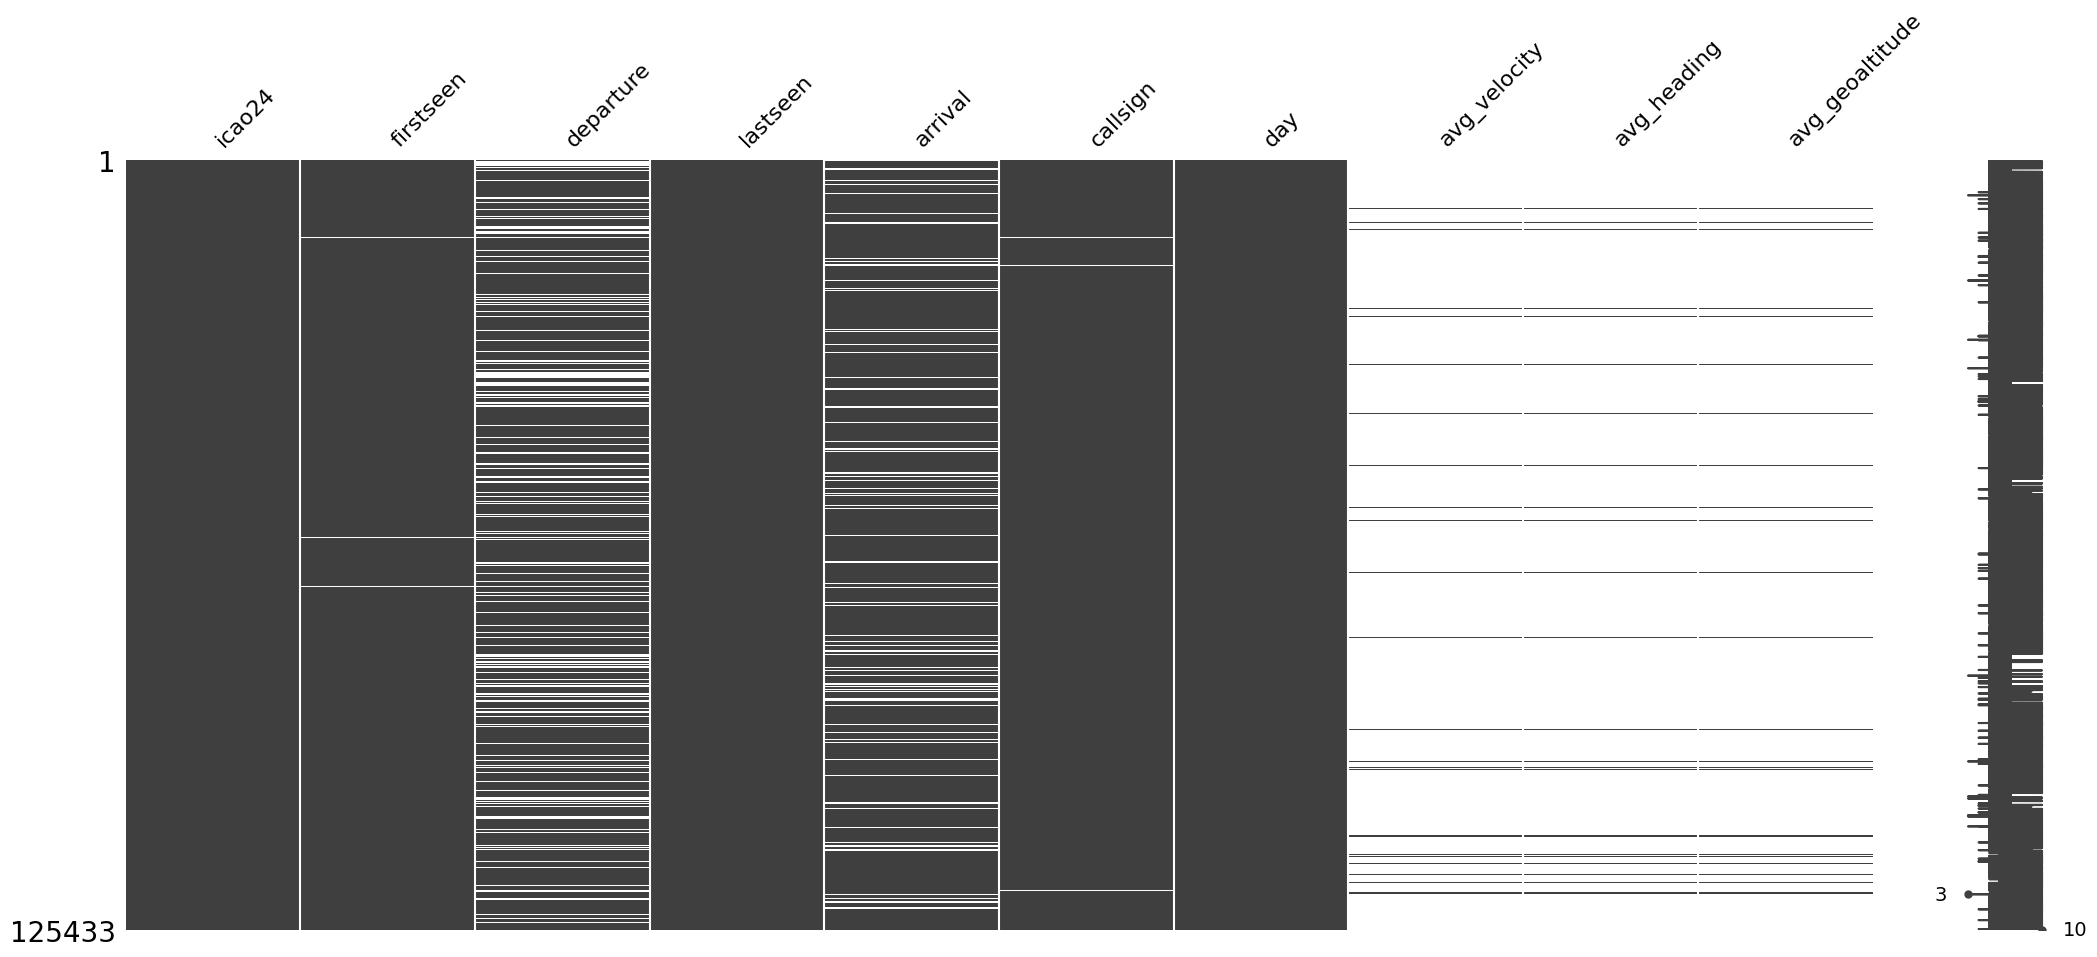

In [26]:
import missingno as msno
msno.matrix(flights_df)
